<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS_412_Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 1 Assignment 2*

In [182]:
# Operational
import re
import string
import requests

#Model training
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Visualization
import matplotlib.pyplot as plt

# Data Cleaning
import pandas as pd
import numpy as np

# NLP
import spacy
nlp = spacy.load("en_core_web_md")
import en_core_web_md
nlp = en_core_web_md.load()

# HTML cleaning
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

* You have `job_listings.csv` in the data folder for this module. 
* However, the text data in the description column is still messy - full of html tags. 
* Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. 
* You will need to read through the documentation to accomplish this task. 

In [161]:
##### Your Code Here #####

# Import Data / preview
data_path = "job_listings.csv"
df = pd.read_csv(data_path)
df.head(10)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
5,5,b'<div>Create various Business Intelligence An...,Data Scientist
6,6,b'<div><p>As Spotify Premium swells to over 96...,Associate Data Scientist – Premium Analytics
7,7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist
8,8,"b""<ul><li>MS in a quantitative discipline such...",Sr. Data Scientist
9,9,b'<div><p>Slack is hiring experienced data sci...,"Data Scientist, Lifecyle"


In [162]:
# Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   426 non-null    int64 
 1   description  426 non-null    object
 2   title        426 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.1+ KB


* The text data in the description column is still messy - full of html tags.
* Use the BeautifulSoup library to clean up this column by removing html tags.
* You will need to read through the documentation to accomplish this task.

In [163]:
data = df['description']
blank_List = []
for index in range(len(data)):
    soup = BeautifulSoup(data[index]).get_text()
    blank_List.append(soup)
    df['new'] = pd.Series(blank_List)


In [164]:
# Grabbing the text from the data
soup = BeautifulSoup(df['description'][0])

# printing an example of the text
soup = soup.get_text().split('b"')[1].replace("/"," ").replace('\\n',' ').replace('\\', " ")
print(soup)
print("=============================================================================================================")
def clean_data(text):
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]" 
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    whitespace_regex = r"\s\s+"
    text = re.sub(whitespace_regex, "", text)
    return text

print(clean_data(soup))

Job Requirements: Conceptual understanding in Machine Learning models like Nai xc2 xa8ve Bayes, K-Means, SVM, Apriori, Linear  Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics Mathematics Computer Science or any other quant specific field. Apply Now"
Job Requirements Conceptual understanding in Machine Learning models like Nai xc2 xa8ve Bayes KMeans SVM Apriori LinearLogistic Regression Neural Random Forests Decision Tr

In [165]:
def remove_html(text):
    """
    Extract text from html boiler plate code. 
    Converts bytes dtype into str dtype
    
    Note
    ----
    Use the regex editor to help you create regular expressions https://regex101.com/
    
    Parameters
    ----------
    text: string or object 
        contains text data that we want to clean
    
    Returns 
    -------
    text: str 
        cleaned text data ready for vectorization
    """
    text = text[2:-1]
    
    # create soup object 
    text = BeautifulSoup(text).get_text().replace("/"," ").replace('\\n',' ').replace('\\', " ")
    
    # extract text from page using beautiful soup
    # eval will strip off whatever datatype or expression that's inside of a string 
    #    see https://docs.python.org/3/library/functions.html#eval for eval docs
    # text = text.split('b"')[1:]
    
    # use regex to clean your text data
    ###BEGIN SOLUTION
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" 
    special_chars_regex = r"[\$\%\&\@+]"
    numerical_regex =  r"\b([1-9]|[12][0-9]|3[01])\b"
    whitespace_regex = r"\s\s+"
    
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)
    text = re.sub(whitespace_regex, "", text)
    ###END SOLUTION
    
    # case normalize and strip extra white spaces on the far left and right hand side
    text = text.lower()


    return text

df["clean_text"] = df.description.apply(lambda text: remove_html(text))

In [166]:
df['clean_text']

0      job requirements conceptual understanding in m...
1      job descriptionas a data scientistyou will hel...
2      as a data scientist you will be working on con...
3      49696756 a monthcontractunder the general supe...
4      location usaxe2 x80 x93 multiple locationsyear...
                             ...                        
421    about us want to be part of a fantastic and fu...
422    internshipat uber we ignite opportunity by set...
423    200000350000 a yeara million people a year die...
424    senior data scientist job descriptionabout usa...
425    cerner intelligence is a new innovative organi...
Name: clean_text, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

* Remove stop words, punctuation and spaces, and whatever else you want to remove

In [167]:
##### Your Code Here #####

def tokenize(document):
    """
    Takes a doc and returns a list of tokens in the form of lemmas.
    Stop words and punctuation are filtered out. 
    """
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

df["lemmas"] = df['clean_text'].apply(tokenize)

df["lemmas"]

0      [job, requirement, conceptual, understanding, ...
1      [job, descriptiona, data, scientistyou, help, ...
2      [data, scientist, work, consult, business, res...
3      [49696756, monthcontractunder, general, superv...
4      [location, usaxe2, x80, x93, multiple, locatio...
                             ...                        
421    [want, fantastic, fun, startup, xe2, x80, x99s...
422    [internshipat, uber, ignite, opportunity, set,...
423    [200000350000, yeara, million, people, year, d...
424    [senior, datum, scientist, job, descriptionabo...
425    [cerner, intelligence, new, innovative, organi...
Name: lemmas, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing
* Pass the tokenizer that you created above as a parameter value into CountVectorizer
* Use CountVectorizer to create a doc-term matrix
* Move your doc-term matrix into a pandas dataframe
    * Get the feature names from your instantiated CountVectorizer object
* Consider using CountVectorizer parameters like stop_words and max_df, min_df to trim your results
Once you've created your dtm dataframe, you might notice that some (or many) of your features result from unclean data. Use this as an opportunity to iteratively improve your tokenizer function.

In [174]:
vect = CountVectorizer(stop_words='english', max_features=1000)
vect.fit(df['clean_text'])
dtm = vect.transform(df['clean_text'])
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
doc_len = [len(doc) for doc in df['clean_text']]
dtm

,100,401k,abilities,ability,able,academic,access,accommodation,accuracy,achieve,...,xa2,xae,xb7,xbb,xc2,xe2,year,years,york,youll
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,8,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,1,1,1,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
424,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0


C:\Users\nigel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


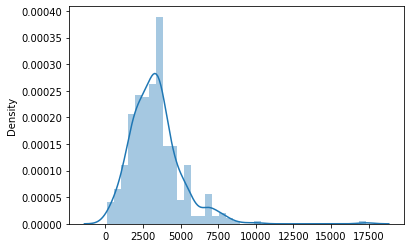

In [177]:
import seaborn as sns

sns.distplot(doc_len);

In [175]:
##### Your Code Here #####

###BEGIN SOLUTION
# COMPLETE THE CODE IN THIS CELL

# create the transformer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

dtm = tfidf.fit_transform(df['clean_text'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

###END SOLUTION

,02,100,1000,100000,180,1800flowerscom,1strategy,200,2000,2012,...,youthe,youve,youwe,youyears,youyou,zenreach,zeus,zf,zillow,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4) Visualize the most common word counts

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix
* Pass the tokenizer that you created above as a parameter value into TfidfVectorizer
* Use TfidfVectorizer to create a doc-term matrix
* Move your doc-term matrix into a pandas dataframe, with columns named according to the vocabulary terms.
* Consider using TfidfVectorizer parameters like stop_words and max_df, min_df to trim your results,

In [181]:
### BEGIN SOLUTION
# Instantiate vectorizer object (ngram_range includes unigrams and bigrams)
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=.97,
                        min_df=.03,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['clean_text']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()
### END SOLUTION

,100,2019,40,401k,500,600,600 city,ability,ability build,ability communicate,...,x99s world,x99ve,x9d,xa6,xc2,xe2,xe2 x80,year,year experience,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126398,0.0,0.152916,...,0.0,0.0,0.0,0.00000,0.181374,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023500,0.0,0.056862,...,0.0,0.0,0.0,0.12896,0.000000,0.168967,0.169387,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062993,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [179]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['machine learning', 
         'artificial intelligence', 
         'data', 'science', 
         'concrete', 'wood', 
         'marble', 'design',
         'color', 'font']


# intialise pca model and tell it to project data down onto 2 dimensions

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.

# let's look at our new 2D word vectors

### BEGIN SOLUTION

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(df['clean_text']))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(df['clean_text']))

# let's look at our new 2D word vectors
word_vecs_2d
### END SOLUTION

array([[ 8.77809876e-02,  6.03338220e-01],
       [-2.51316751e-01,  2.14081561e-02],
       [ 2.72538523e-01, -7.02928350e-02],
       [-2.01098996e-01, -1.52087993e-01],
       [ 7.41041192e-01,  9.02210497e-02],
       [ 4.66603192e-01, -2.85056940e-02],
       [-3.51297753e-01, -5.44075523e-02],
       [ 9.61659662e-02, -2.71110175e-01],
       [ 1.04773117e-01, -5.58942587e-02],
       [-3.59667958e-01, -1.97794978e-01],
       [ 5.06371459e-02, -6.85164348e-02],
       [-5.22718552e-01,  1.83890103e-01],
       [ 8.55312370e-02,  3.98652591e-01],
       [-3.51297753e-01, -5.44075523e-02],
       [-5.09393315e-03, -7.25395080e-02],
       [-2.24869568e-01, -1.19565658e-01],
       [-4.35674880e-01,  5.42437067e-02],
       [-2.97059791e-01,  8.61946019e-02],
       [ 9.61659662e-02, -2.71110175e-01],
       [ 1.70446801e-01,  5.38316324e-01],
       [ 8.22584421e-02,  2.30915503e-02],
       [-1.29102015e-01,  9.72327685e-02],
       [-3.16021331e-03, -1.37657028e-01],
       [-7.

* Stretch: see if you can make a visualization of this TF-IDF Document-Term matrix, as you did in Part 3 for the CountVectorizer Document-Term matrix, i.e. using a barplot.

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings
* Write the description of your ideal data science job and use it to query job listing!

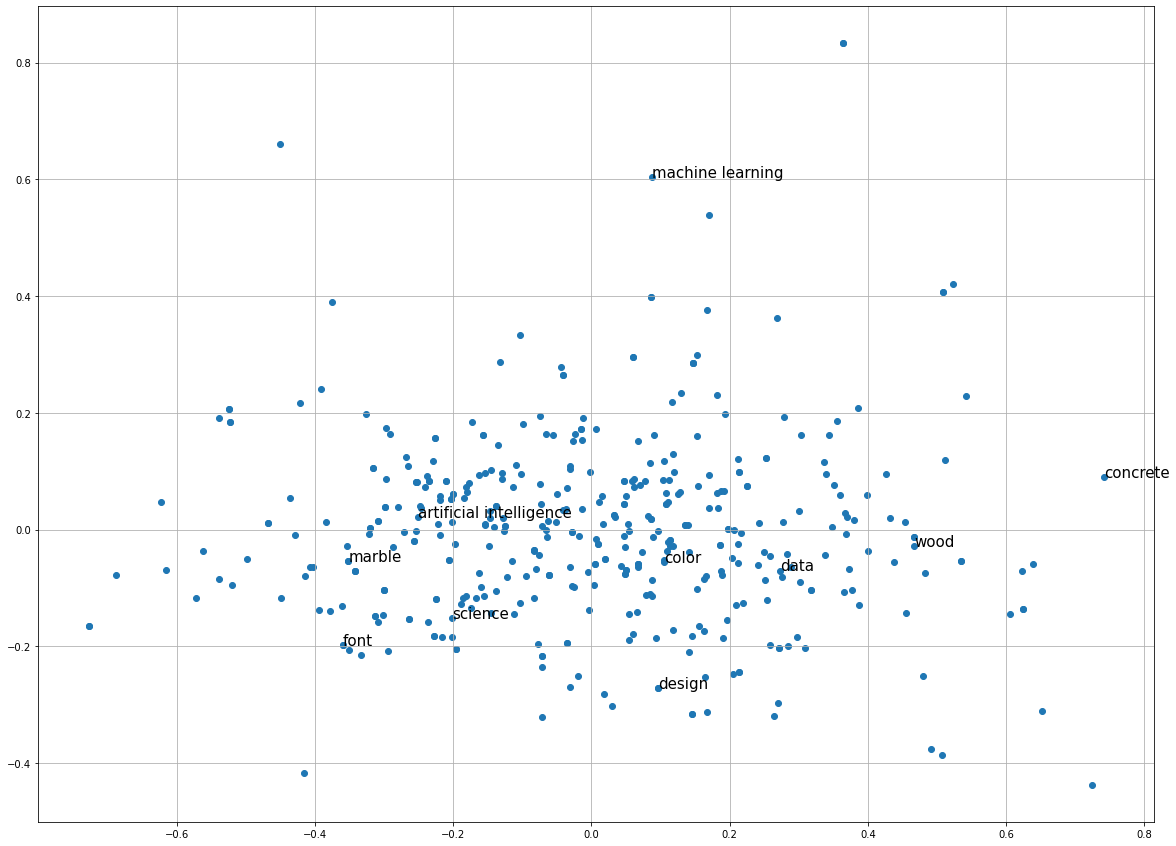

In [180]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.grid();
plt.show()

In [ ]:
##### Your Code Here #####

# vectorize your ideal job description using your fitted tfidf vectorizer 
ideal_job_vector =

# fit NearestNeighbors model to the Indeed reviews document-term matrix that you created
# YOUR CODE HERE#

# get top_n_neigh distances and review indices for reviews that are closest to your ideal job
n_dist, n_ind = nn.kneighbors(ideal_job_vector)

# look at a few of the most similar job descriptions to your ideal job
# Did your query find good matches?
# YOUR CODE HERE

In [183]:


# Fit on DTM

# sample a doc from dtm to use as our query point 


# Query Using kneighbors 


### BEGIN SOLUTION
# Fit on DTM
# NOTE: nn counts the original document as one of the neighbors, so if we want 5 nearest neighbors, we set n_neightbors=6
nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
nn.fit(dtm)

# sample a doc from dtm to use as our query point
doc_index = 0
doc = [dtm.iloc[doc_index].values]

# Query Using kneighbors 
neigh_dist, neigh_index = nn.kneighbors(doc)
### END SOLUTION

In [184]:
print(neigh_index)

[[  0 338  79 229 366 403]]


## Stretch Goals: do one of more of these that strike your fancy!

 - Watch Josh Starmer's video [StatQuest: Principal Component Analysis (PCA), Step-by-Step](). 
 - Now go back and review the section "Can we visualize word vectors?" from the [lecture video](https://drive.google.com/file/d/1QuwkO2Uj5sONFtqCk0_d2zrks2I6stkN/view?usp=sharing). 
 - Write a brief description of your understanding of Principal Components Analysis, and how it was used to visualize word vectors. Do your own experiments to explore relationships of words in two dimensions. 
 - Write a summary of what you discovered.
 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings?
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. Hint: compose a query that references a number of tech stack items. How are those items distributed among the job listings?
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
    - **Hint:** K-means might not be the best algorithm for this; algorithms that depend on Euclidean distance break down with high dimensional data. Do a bit of research to see if you can identify a suitable clustering algorithm.
 